
# ITMAL Exercise

REVISIONS| |
---------| |
2018-1218| CEF, initial.
2018-0214| CEF, major update.
2018-0220| CEF, added code reference.
2018-0220| CEF, fixed revision table malformatting.
2018-0225| CEF, minor text updates, and made Qc optional.

## Model capacity and under/overfitting

NOTE: text and code from [HOML]

This example demonstrates the problems of underfitting and overfitting and
how we can use linear regression with polynomial features to approximate
nonlinear functions. 

The plot shows the function that we want to approximate,
which is a part of the cosine function. In addition, the samples from the
real function and the approximations of different models are displayed. The
models have polynomial features of different degrees. We can see that a
linear function (polynomial with degree 1) is not sufficient to fit the
training samples. 

This is called **underfitting**. A polynomial of degree 4
approximates the true function almost perfectly. However, for higher degrees
the model will **overfit** the training data, i.e. it learns the noise of the
training data.

We evaluate quantitatively **overfitting**/**underfitting** by using
cross-validation. We calculate the mean squared error (MSE) on the validation
set, the higher, the less likely the model generalizes correctly from the
training data.

### Qa Explain the polynomial fitting via code review

Review the code below, write a __short__ code review summary, and explain how the polynomial fitting is implemented?

Do not dig into the plotting details, but explain the outcome of the plots.

Iterating...degrees= [1, 4, 15]
  degree=   1, score_mean=0.41,  PolynomialFeatures(degree=1, include_bias=False, interaction_only=False)
  degree=   4, score_mean=0.04,  PolynomialFeatures(degree=4, include_bias=False, interaction_only=False)
  degree=  15, score_mean=180526263.32,  PolynomialFeatures(degree=15, include_bias=False, interaction_only=False)


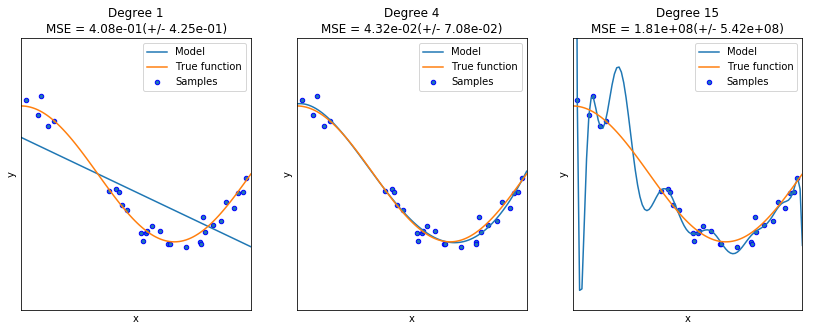

OK


In [1]:
# TODO: Qa...review this code

# NOTE: code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

def GenerateData(n_samples = 30):
    X = np.sort(np.random.rand(n_samples))
    y = true_fun(X) + np.random.randn(n_samples) * 0.1
    return X, y

np.random.seed(0)

X, y = GenerateData()
degrees = [1, 4, 15]
    
print("Iterating...degrees=",degrees)
plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    
    linear_regression = LinearRegression()
    pipeline = Pipeline([
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression)
        ])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10)
    
    score_mean = -scores.mean()
    print(f"  degree={degrees[i]:4d}, score_mean={score_mean:4.2f},  {polynomial_features}")   

    X_test = np.linspace(0, 1, 100)
    y_pred = pipeline.predict(X_test[:, np.newaxis])
    
    # Plotting details
    plt.plot(X_test, y_pred          , label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()
print('OK')

### Qb Explain the capacity and under/overfitting concept

Write a textual description of the capacity and under/overfitting concept using the plots in the code above.

What happens when the polynomial degree is low/medium/high with respect to under/overfitting  concepts? Explain in details.

In [2]:
# TODO: Qb...in text

### [OPTIONAL] Qc Score method

Why is the scoring method called `neg_mean_squared_error` in the code? What happens if you try to set it to `mean_squared_error`?

```python
scores = cross_val_score(pipeline, X[:, np.newaxis], y, scoring="mean_squared_error", cv=10)
```

Why does the Degree 15 model have a MSE of 1.81E8, and hence not the best MSE?...WARNING: I am not able to explain it yet!

In [3]:
# TODO: Qc...